In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Lecture 7 - Classification, Naive Bayes, Generalization, Overfitting, Evaluation, Cross-validation and Scikit-learn

# Table of Contents
* [Lecture 7- Classification, Naive Bayes, Generalization, Overfitting, Evaluation, Cross-validation and Scikit-learn](#Lecture-6--Classification,-Naive-Bayes,-Generalization,-Overfitting,-Evaluation,-Cross-validation-and-Scikit-learn)
	* &nbsp;
		* [Content](#Content)
		* [Learning Outcomes](#Learning-Outcomes)
* [Classification](#Classification)
	* &nbsp;
		* [Example dataset - Wine](#Example-dataset---Wine)
* [Naive Bayes](#Naive-Bayes)
	* &nbsp;
		* &nbsp;
			* [Probabilities](#Probabilities)
			* [Joint probabilities](#Joint-probabilities)
		* [Probability density functions](#Probability-density-functions)
		* [Steps for calculating the classification for naive Bayes](#Steps-for-calculating-the-classification-for-naive-Bayes)
		* [Comparing Naive Bayes to k-NN](#Comparing-Naive-Bayes-to-k-NN)
* [Generalization](#Generalization)
* [Overfitting](#Overfitting)
* [Classifier Evaluation](#Classifier-Evaluation)
* [Cross-Validation](#Cross-Validation)
* [Machine Learning - Evaluating Multiple Algorithms](#Machine-Learning---Evaluating-Multiple-Algorithms)
* [No Free Lunch](#No-Free-Lunch)
* [Classification Process Summarized](#Classification-Process-Summarized)
* [Putting it all together in scikit-learn](#Putting-it-all-together-in-scikit-learn)


---

### Content

1. Classification
2. Naive Bayes
3. Generalization
4. Overfitting
5. Classifiers goodness-of-fit
6. Cross-validation
7. Comparing multiple classifiers
8. Scikit-learn

### Learning Outcomes

At the end of this lecture, you should be able to:

* explain the difference between classification and regression
* program and apply the Naive Bayes to classification tasks
* explain the theory of generalization, the phenomenon of overfitting, and the 'no free lunch' theorem
* discuss and apply various measures for evaluating classifier accuracy
* use cross-validation for training and evaluating classifiers
* compare the accuracies of multiple classification algorithms across multiple datasets
* use the scikit-learn module to train and test Naive Bayes classifiers
---

# Classification

In machine learning, classification is the task of devising a *classifier* capable of assigning a particular class/category to an unknown instance/sample from a set of possible classes. A machine learning algorithm builds, evaluates and optimises a classifier on the training data in  such a way that it discriminate instances of different classes from each other, in the hope that these patterns will *generalise* and be valid on data which the algorithm has not *seen* during the training phase. 

Classification (like regression) belong to a family of **supervised learning** methods. In order to be able to perform supervised learning, a training set is required where all of the samples' **class values are known in advance**. The classifier is **trained** to learn how to map each of the samples' features/attributes to their corresponding class labels.

Once the classifier is trained to do this on a fully labelled dataset, the classifier is then used to classify unknown samples into class labels given the samples feature vectors only. If there are two classes used in the prediction, then this is referred to as a **binary classification problem**. If there are more than just two classes in the dataset, this is than called a **multiclass classification problem**. 

As the number of classes in a prediction problem increase, so does the difficulty in maintaining high accuracy. 

A classifier can be fixed-size (irrespective of the amount of data provided for training), or it can be variable, and thus grow in complexity with the amount of available data, allowing it to capture and encode complex decision boundaries.

Classification is an immensely vital and widely used technique. Examples of classification are found in classifying whether or not a given email is of a class "spam" or "non-spam"; banks use it to classify if a given transaction is "legitimate" or "fraudulent" class; medical staff have technologies to assigning a diagnosis to a given patient as described by observed characteristics of the patient; financial analysts use it to predict if a given stock should be classified as "invest now" or "do not invest" at a given point in time given a range of accompanying indicators. 

In order to perform classification, an algorithm is first needed that creates a classifier. There are many types of machine learning classification algorithms. 

We have looked kNN and seen how it can be used as a classification algorithm. Some of the other well known ones are Neural Networks, Support Vector Machines, Tree classifiers, Boosted Ensembles, Bagging, Random Forests as well as Naive Bayes.

### Example dataset - Wine

We will return to the Wine dataset to explore classification.

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mtpl
#import mpld3
import seaborn as sns

%matplotlib inline

df = pd.io.parsers.read_csv(
    'wine_data.csv',
     usecols=[0,6,7]
    )

df.columns=['Class','Magnesium','Flavanoids']

df['Class'].replace('3', 0, inplace=True)
df.to_csv('wine_data_test.csv', header=None, index=None)

df.head(5)

,Class,Magnesium,Flavanoids
0,1,2.80,3.06
1,1,2.65,2.76
2,1,2.80,3.24
3,1,3.85,3.49
4,1,2.80,2.69


Confirm we have 3 class labels:

In [5]:
df.Class.unique()


array([1, 2, 0], dtype=int64)

Confirm data types:

In [6]:
df.dtypes


Class           int64
Magnesium     float64
Flavanoids    float64
dtype: object

In classification problems, the **ability to separate classes** from one another is the most important consideration. Histograms of the feature values per class type, can be a useful tool for **eyeballing** some features and to get a rough feeling for their **discriminative power**. 

Here we are visualising the histograms of the two features for each of the three classes:

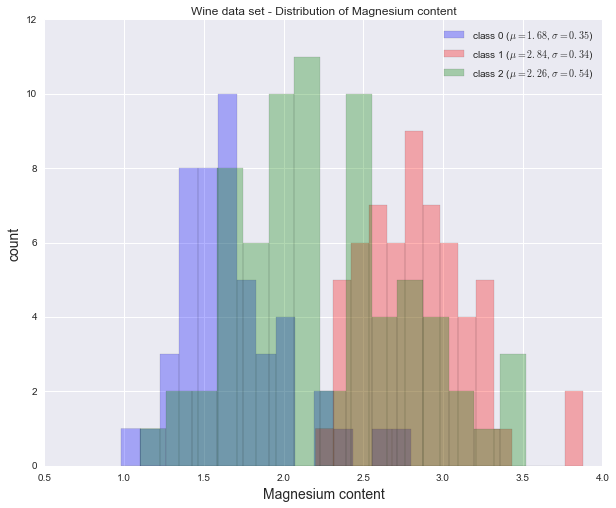

In [7]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,8))

colors = ('blue', 'red', 'green')

for label,color in zip(range(0,3), colors):
    mean = np.mean(df['Magnesium'][df['Class'] == label]) # class sample mean
    stdev = np.std(df['Magnesium'][df['Class'] == label]) # class standard deviation
    df['Magnesium'][df['Class'] == label].hist(alpha=0.3, # opacity level
             label='class {} ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(label, mean, stdev), 
             color=color,
             bins=15)

plt.title('Wine data set - Distribution of Magnesium content')
plt.xlabel('Magnesium content', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.legend(loc='upper right')

plt.show()

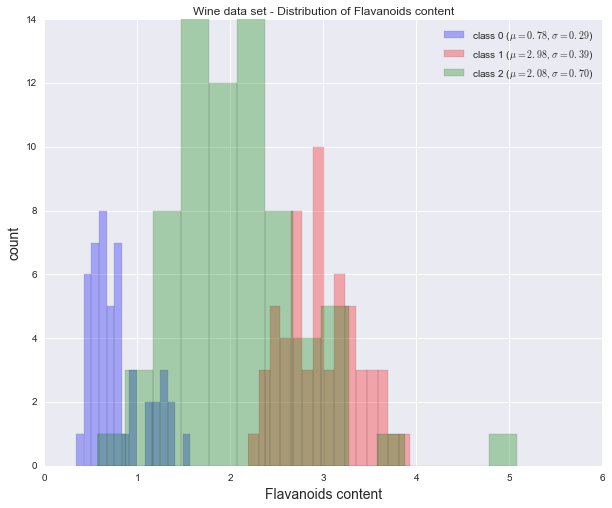

In [8]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,8))

colors = ('blue', 'red', 'green')

for label,color in zip(range(0,3), colors):
    mean = np.mean(df['Flavanoids'][df['Class'] == label]) # class sample mean
    stdev = np.std(df['Flavanoids'][df['Class'] == label]) # class standard deviation
    df['Flavanoids'][df['Class'] == label].hist(alpha=0.3, # opacity level
             label='class {} ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(label, mean, stdev), 
             color=color,
             bins=15)

plt.title('Wine data set - Distribution of Flavanoids content')
plt.xlabel('Flavanoids content', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.legend(loc='upper right')

plt.show()

# Naive Bayes

Naive Bayes (NB) is a classical statistical machine learning algorithm. It is based on one of the most important equations both in statistics as well as in science as whole - the **Bayes Theorem**. 

The Bayes Theorem is the foundation of a large branch of statistics that has an increasing relevance in solving real-world data science problems called **Bayesian Statistics**. Under this subfield of statistics, advanced methods like, Bayesian networks, Hidden Markov Models, Markov Random fields and probabilistic relational models are situated.

With the Bayes Theorem the **evidence about the true state of the world is expressed in terms of degrees of belief (probabilities)**. As such, the Bayes Theorem deals with **conditional probabilities between different events**. 

*It allows us to calculate the probability of some even A occurring given that some evidence B is true.*

#### Probabilities

Say we are developing an email spam filter. We are dealing with two classes, **spam** and **non-spam**. We look through all the spam emails in our email account and we find that 20% of them have the word 'Viagra' in them, while 80% contain the word 'Bank'. We would express this as: 

\begin{equation}
p(Viagra) = 0.2
\end{equation}

and

\begin{equation}
p(Bank) = 0.8
\end{equation}

If we assume that the occurrence of the above words in the emails is independent of each other (which means that one does not influence the other), than we can calculate the probability of encountering a spam email having both these words is:

0.2 $\times$ 0.8 = 0.16, which is p(Viagra)p(Bank).

This can be fully expressed as:

\begin{equation}
p(Viagra\ and\ Bank | Spam)
\end{equation}

meaning the probability of Viagra and Bank occurring together, given a spam email.

The above in effect expresses:

\begin{equation}
p(Words | Class)
\end{equation}

meaning the probability of certain words occurring for a given class which could be spam or non-spam. However, we are interested in prediction, so for us the above needs to be inverted because we want to know what is the probability of something being spam or non-spam given certain words we have come across in an email. In effect, what we are interested in is:

\begin{equation}
p(Class | Words)
\end{equation}

Our problem is that 

\begin{equation}
p(Class | Words) \neq p(Words | Class)
\end{equation}


Fortunately, 250 years ago, the British mathematician **Thomas Bayes** figured out how to resolve this.

#### Joint probabilities

Since

\begin{equation}
p(A\ and\ B) = p(B)p(A) 
\end{equation}

**is not always true**, generally the joint probability of two events is therefore expressed as follows:

\begin{equation}
p(A\ and\ B) = p(B|A)p(A)
\end{equation}

where p(B|A) represents the probability of B occurring, given that A has occurred. The above equation is also  interchangeable as:

\begin{equation}
p(A\ and\ B) = p(A|B)p(B)
\end{equation}

by pulling the two pieces together we have: 

\begin{equation}
p(B|A)p(A) = p(A|B)p(B)
\end{equation}

This now brings us to the Bayes Theorem and to the solution to our problem. For our problem, if we make B the class label of 'spam' (which is the probability we would like to predict), and A the words in the email (like viagra or bank), then we can solve by re-arranging this equation as:

\begin{equation}
P(B|A) = \frac{P(A | B)\, P(B)}{P(A)}\cdot
\end{equation}

By plugging in our problem into the formula, we would get:

\begin{equation}
P(Class|Words) = \frac{P(Words | Class)\, P(Class)}{P(Words)}\cdot
\end{equation}

Breaking the formula down, P(Words|Class) is called the **likelihood** and we can calculate this from our training set. The likelihood can be phrased as given all the spam emails, what is the probability that the words like 'viagra' and 'bank' occur in any document. It is essentially the product of each of the probabilities for every individual word.

Naive Bayes is naive, because it assumes independence amongst the features in the calculation of the likelihood which in our example we express simply as p(Viagra)p(Bank).

The P(Class) is called the **prior**. This we can also calculate from our dataset as being the proportion of emails that are classed as spam.

The P(Words) is called the **normalising constant** (which is simply the probability of seeing this pattern without knowing what class it belongs to  - this is the least important component and in the end reduces down to simply the sum of all class probabilities), while the P(Class|Words) is called the **posterior** and is the result we are looking for.

Let us continue the email spam filter example, but before we proceed we will need to complete the describing our dataset.

Say we were examining a total of 100 emails, both spam and non-spam. 40 of those were spam and the rest were not. Of the 60 emails that were not spam, the word 'Viagra' appeared 5% and the word 'Bank' 10%. Across the entire dataset, the probability of finding 'Viagra' and 'Bank' in the emails, irrespective of what class the email belonged to was 7% (but this part can be left out).

Our goal is to find out which class label is the most probable given the particular word features:


In [9]:
#caclulate p(spam| viagra and bank)
((0.2 * 0.8) * 0.4) / (0.07)



0.9142857142857144

In [10]:
#caclulate p(non-spam| viagra and bank)
((0.05 * 0.1) * 0.6) / (0.07)



0.04285714285714286

From this we can say that the probability of an email containing words viagra and bank is more probable to be spam than non-spam and we therefore assign the class label to the feature ['Viagra','Bank'] as **spam**.

In many classification tasks, you have to deal with incomplete or missing values. As it turns out **Naive Bayes is really good for dealing with missing values and is able to produce a classification without having all the features, whereby the likelihood is simply calculated by excluding the particular missing feature.**

The above simplistic example considered features that were **categorical** and were represented as frequencies. 

How would we apply Naive Bayes to the wine dataset where the features for 'Magnesium' and 'Flavanoids' are numerical?

### Probability density functions

Below is an example of the Gaussian (normal) probability density function (PDF).

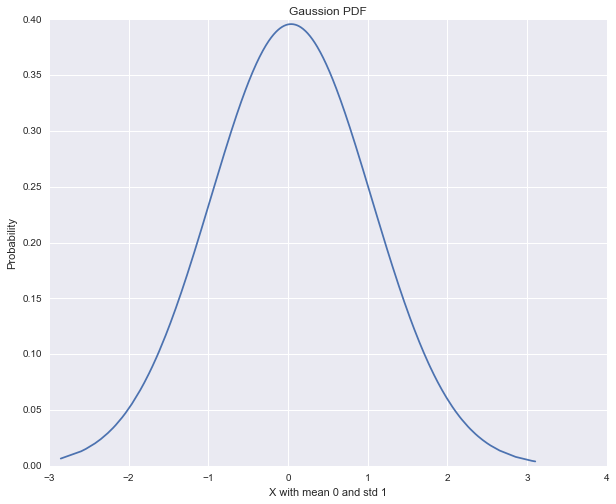

In [11]:
import numpy as np
import scipy.stats as stats

h = np.random.randn(1000)
h.sort()
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

plt.figure(figsize=(10,8))
plt.plot(h,fit,'-')
plt.title('Gaussion PDF')
plt.xlabel('X with mean 0 and std 1')
plt.ylabel('Probability')



The PDF for the normal distribution is given by a rather formidable looking expression:
<div style="font-size: 150%;"> 
\begin{equation}
f(x, \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} e^{ -\frac{(x-\mu)^2}{2\sigma^2} }
\end{equation}



Take a deep breath and relax though. 

All we need to do is calculate the mean $\mu$, standard deviation $\sigma$ and plug them together with our value $x$ into the equation in order to get the probability that our quantity lies within a small region of $x$ for each of the class labels.

### Steps for calculating the classification for naive Bayes

For each class:

1. Calculate the probability for each of the features and then calculate their product - this represents the likelihood component of the Bayes Theorem.

2. Multiply the likelihood by the prior for a given class (the proportion of all samples belonging to this class that make up the training dataset) - to give us the posterior probability that we are finally looking for.

3. The class with the largest posterior probability is the class that wins the classification.

4. Divide the posterior of each class with the sum of all posteriors in order to normalize and to finish up with a more interpretable probability.

**Exercise:** write a function to calculate the PDF for a normal distribution as below:

In [ ]:
def pdf_gaussian(x, mean, std):
    return 


In [ ]:
x = 66 
mean = 73
std = 6.2
pdf_gaussian(x, mean, std)



Given the wine dataset we saw previously: 

In [ ]:
df.head(5)

In [ ]:
df = pd.read_csv(
    '../datasets/wine_data.csv',
     usecols=[0,6,7]
    )
print df.columns
df.columns=['Class','Magnesium','Flavanoids']
df['Class'].replace(3, 0, inplace=True)
df.head()

**Exercise:** Write a function takes a data frame and a class label and returns a dictionary containing the keys for each of the feature names in the dataset with an associated list having 2 elements, where the first is the mean and the second the standard deviation of the given feature:

In [ ]:
def calculate_class_statistics(df, class_label):
    class_distr = {}
    feature_types = []
    
    feature_types =  df.columns[1:]
    means = (df[feature_types][df.Class == class_label]).mean()
    stds = (df[feature_types][df.Class == class_label]).std()
    
    for feat in feature_types:
        #YOUR CODE HERE
        
    return class_distr



In [ ]:
calculate_class_statistics(df, 1)
#SHOULD RETURN:
#{'Flavanoids': [2.982372881355932, 0.39749360863676325],
# 'Magnesium': [2.8401694915254234, 0.33896135231546792]}

**Exercise:** Write a function to train a NB classifier that takes in a data frame and returns a dictionary containing the following:


where the key is the class label and the value is a dictionary, containing means and standard deviations for each feature for each class, as well as a key for the prior and its associated value:

In [ ]:
def train_naive_bayes(df):
    NB_classifier = {}
    class_labels = df.Class.unique()
    
    for i in class_labels:
        #YOUR CODE HERE
        
        
    return NB_classifier



In [ ]:
NB_classifer = train_naive_bayes(df)
NB_classifer


**Exercise:** We are now going to move to classification. Write a function that takes as input a tuple from the dictionary above as well as a series object to classify and returns the Bayes probability for this class:

In [ ]:
def calculate_NB_probability_single_class(nb_classifier, series_x):
    likelihood = 1.0 
    
    for feat in nb_classifier.keys():
        #YOUR CODE HERE
            

    return posterior



In [ ]:
series_x = pd.Series([2.0, 2.3], index=['Flavanoids', 'Magnesium'])

calculate_NB_probability_single_class(NB_classifer[str(1)], series_x)
#SHOULD RETURN 0.0051879593513192053



**Exercise:** Write a function that classifies a series object into a class and returns its probability:

In [ ]:
def classify_naive_bayes(NB_classifer, series_x):
    classification = -1
    classification_probabilities = []
    prob = 0.0
    total_ptobabilities = 0.0
    
    
    for i in NB_classifer:
        #YOUR CODE HERE
    
    #select winning class
    for i in range(len(classification_probabilities)):
        #YOUR CODE HERE
    
    #normalize probability
    return classification, prob / total_ptobabilities



In [ ]:
series_x = pd.Series([4.0, 2.3], index=['Flavanoids', 'Magnesium'])

winning_class, prob = classify_naive_bayes(NB_classifer, series_x)
winning_class, prob
#SHOULD RETURN ('1', 0.50456450520692542)



**Congratulations you have now fully implemented, trained and deployed your first classifier!**

**Exercise:** Write a function that takes in at NB classifier and a dataset and classifies each sample in the dataset. It creates two new columns on the dataset called 'Classification' and 'Probability' of the classification and returns the data frame:

In [ ]:
def classify_dataset(NB_classifer, df):
    res = []

    for i in range(len(df)):
        #YOUR CODE HERE

    return pd.concat([df, res_df], axis=1)



In [ ]:
df_result = classify_dataset(NB_classifer, df)
df_result.head(100)



### Comparing Naive Bayes to k-NN

>  Naive Bayes is a linear classifier, while k-NN is not. The
curse of dimensionality and large feature sets are a problem for k-NN,
while Naive Bayes performs well. k-NN requires no training (just load
in the dataset), whereas Naive Bayes does. Both are examples of supervised
learning (the data comes labeled). 

Schutt, R., & O'Neil, C. (2013). Doing Data Science: Straight Talk from the Frontline. " O'Reilly Media, Inc.".


kNN is in many ways a special case of a supervised machine learning algorithm. It is unique in that the data itself is the model and no training of a classifier takes place explicitly. kNN is particularly susceptible to deteriorating accuracy if there are meaningless features in the dataset. Hence, feature analysis should always be performed together with dimensionality reduction if using kNN.

Naive Bayes is more robust against outliers as well as un-informative features than kNN. However, one has to be careful with Naive Bayes because it is naive in terms of assuming independence between features, which is almost never true in reality. Therefore Naive Bayes is vulnerable when this assumption is strongly violated and when there is a large presence of highly correlated and redundant features, the training will bias the final result towards those features, and the final probabilities are unlikely to be accurate for interpretation.

# Generalization

The goal of training a classifier, or creating a predictive model on a particular dataset is not so that it would make accurate predictions only on these samples. To use an absurd scenario, we could potentially create a look-up table, or an immense set of if-else statements for every example in a dataset and thereby achieve 100% accuracy. This process would be called memorising the data and is practically useless for the task of predictive analytics.

Instead, the goal is that the classifier would uncover and encode patterns describing the underlying structural relationships, with the intention of them generalising and thus being able to accurately predict data that the algorithm has not previously "seen". This is referred to as  generalization. In essence, machine learning is the attempts to take the limited amount of information it can gather and generalise. it embodies the movement from the 'specific to the general'.

Generalization is the property of a classifier or modelling process, whereby the classifier is relevant for prediction purposes on data that were not used to train it. We must keep in mind that every dataset is a finite sample of a total population for a given domain (unless you have a dataset that contains all samples that will ever be used to describe a given problem.). And we want the classifier to be fit-for-purpose on the population of a given domain as a whole.

Hence, creating a classifier that is perfectly accurate on one a training dataset is no guarantee of it being accurate at predicting unseen samples. In fact, machine learning algorithms are notoriously susceptible to finding meaningless, or phantom patterns that are random idiosyncrasies within a given dataset sample, and have no value beyond the data outside of the training dataset. 

Sometimes we may have concerns that the training data were not representative of the true population which leads to bad generalization - and this does happen, often. The data can be noisy (mislabelled or erroneous data), have lots of outliers (valid but extreme values). But often it is the case that the algorithm used to train a classifier or build a model, created too good of a "fit" (too complex) on the training dataset that is ultimately useless and misleading beyond the samples it trained on.

Training classifiers which are variable-size (optimisable) and can thus increase in complexity, often leads to the pattern below. Both the training and generalisation (test) error decrease initially during the early stages of classifier training. If the training ceases too early, then the classifier has usually not been given enough time to learn the separating class decision boundary sufficiently. This is referred to as underfitting. As the training algorithm builds a more complex classifier (model), the training error will continue to decrease. As the training error approaches zero, the training algorithm is said to 'converge'. However, complete convergence does not necessarily mean that the classifier will generalise well. It is usually quite easy to achieve full convergence on a training set. The difference between the final training error (convergence) and the generalisation (test) error is the indicator of the degree of overfitting that has occurred. Generalisation error will always be greater than the training error. However, we want this difference to be as small as possible.   

![Source Wikipedia](figures/generalization_overfitting.jpg)

Source: Janert, P. K. (2010). Data analysis with open source tools.  O'Reilly Media, Inc

# Overfitting

Overfitting is usually what happens when classifier generalization is not achieved. It is the tendency of machine learning and data mining algorithms to tailor classifiers to the training data, at the expense of generalization to previously unseen data points. 

It should be noted that inherent within all machine learning and data mining algorithms is the tendency to overfit to some degree. Some algorithms will accentuate this tendency more than others and it will often depend on the dataset and the type of the problem.

If we try hard enough and push the classifiers to become more and more complex, the algorithms will invariably find patterns in a dataset. The Nobel Laureate Ronald Coase one said

> “If you torture the data long enough, it will confess.”

The problem of overfitting is probably one of the greatest challenges for a data scientist.

> The answer is not to use a data mining procedure
that doesn’t overfit because all of them do. Nor is the answer to simply use models
that produce less overfitting, because there is a fundamental trade-off between model
complexity and the possibility of overfitting. Sometimes we may simply want more
complex models, because they will better capture the real complexities of the application
and thereby be more accurate. There is no single choice or procedure that will eliminate
overfitting. The best strategy is to recognize overfitting and to manage complexity in a
principled way.

Provost, F., & Fawcett, T. (2013). Data Science for Business: What you need to know about data mining and data-analytic thinking. " O'Reilly Media, Inc.".

# Classifier Evaluation

In order to be able to ascertain if our classifier is both learning the training dataset (converging) or overfitting on previously unseen data, we need to have some evaluation metrics at our disposal. 

Fortunately the field of machine learning and data mining has been around for a long time so there are some very well established metric that enables us to evaluate our classifiers.

Multiclass classification problems are treated similarly, however, there is usually a greater need in multiclass problems to break down the classification results at per-class label level in order to examine the performance. This is often necessary in the presence of unbalanced class distributions. 

A binary class confusion-matrix is a good starting point to visualize and understand the performance of a classifier. Each column of the matrix represents the instances in a predicted class, while each row represents the instances in an actual class. The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabelling one as another).


![Source Wikipedia](figures/confusion_matrix.jpg)

Source: http://en.wikipedia.org/wiki/Confusion_matrix



![Source Wikipedia](figures/classification_terms.jpg)

Source: http://en.wikipedia.org/wiki/Confusion_matrix

In [13]:
df_result.head(100)


NameError: name 'df_result' is not defined

In [ ]:
df_result.dtypes


In [ ]:
df_result['Classification'] = df_result['Classification'].astype(int)


**Exercise:** Given the Wine df_result from above, write a function that accepts it and returns a confusion matrix data frame:

In [ ]:
def calculate_confusion_matrix(df):
    #YOUR CODE HERE
            
    return confusion_matrix_df
    
    

In [ ]:
print calculate_confusion_matrix(df_result)


In [ ]:
idx = list(df.Class.unique())
idx.sort()
print idx

In a multiclass scenario, the confusion matrix can easily be extended it an $n \times n$ matrix where $n$ is the number of classes. In a multiclass setting it is particularly informative to know which classes are being misclassified as labels of another class. 

Below is an example of a multiclass matrix from  a real-word dataset having 5 class labels:

![Source Wikipedia](figures/multiclass_confusion_matrix.jpg)

Another important measure that is insightful in respect to the accuracy of each given class label is the F-value (known also as the F-measure or the F-score), whose calculation can be made using the following:






<div style="font-size: 150%;"> 
$F_i = 2 \times \frac{\mathrm{Precision_i} \times \mathrm{Recall_i}}{\mathrm{Precision_i} + \mathrm{Recall_i}}$
</div>






The example below gives another real-world example (using the Yeast dataset from https://archive.ics.uci.edu/ml/datasets/Yeast) of how the F-values metric can be displayed. This example particularly demonstrates the problem of datasets that possess uneven class distributions. Training classifier on such problem is very difficult and all algorithms struggle to produce classifiers that accurately generalises on all class labels within such datasets. Evaluating datasets with such problems is to some degree elevated using the F-value metric:

![Source Wikipedia](figures/f_value_example_on_yeast_dataset.jpg)

Often though, on class-unbalanced problems, it is necessary to derive a single value to express the accuracy of a dataset. In these cases the total error (or accuracy) metrics as completely inadequate and a very good alternative is the Geometric mean:


<div style="font-size: 120%;">  
$Geometric\ mean = \left(\prod_{i=1}^n Recall_i \right)^{1/n}$
</div>

**Exercise:** Write a function that calculates the geometric mean for the data frame below:

In [ ]:
df_result.head()

In [ ]:
def calculate_geometric_mean(df):
    gmean = 1.0
    matrix = calculate_confusion_matrix(df)
    
    for i in range(len(matrix)):
        #YOUR CODE HERE
   
    return np.power(gmean, 1.0 / float(len(matrix)))
    
    

In [ ]:
calculate_geometric_mean(df_result)
#SHOULD PRODUCE 0.78912823939580679


# Cross-Validation

Under generalization and overfitting, we discussed the importance of developing classifiers that do not just remember the training data but are able to generalize on data that the machine learning algorithms had not previously seen. One solution is to split datasets into training and test sets. The training is performed on one, and the generalization is determined on the other.

There are some problems with doing it this way. By defining  two sets, we reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, test) sets. Also, what proportion of data do we use for training and what for testing?

Another approach which is more robust, is to split the whole data several consecutive times in different
train set and test set combinations, and to return the averaged value of the prediction
scores obtained with the different sets. This technique is called **k-fold cross-validation**. Where the k determines the number segments that the data is to be split into. In this procedure, 1 fold is retained for testing the classifier and the other k-1 folds are used for training.

In the image example below, k=4 (4 folds). The classifier will be trained on the combination of 3 folds and  evaluated on the 4th fold (the test fold). This procedure is then repeated 4 times until every fold has been used as the test set once so that we can eventually calculate the average error rate of our model from the error rate of every iteration, which gives us an idea of how well our model generalizes.


![Source Wikipedia](figures/cross-validation-001_small.png)

Source: https://github.com/rasbt/pattern_classification/blob/master/machine_learning/supervised_intro/images/cross-validation-001_small.png

Keep in mind that the algorithm at all times is provided with the correct answers, but when the algorithm makes predictions, it does not refer to them, but instead uses the correct answers only to compare its own prediction to.

Give the serious problem of class-imbalanced datasets, the most robust way to implement the above procedure is by using what is called the **stratified k-fold cross-validation**. By stratified, we mean that every fold will not only be of equal size as the other folds in terms of the number of samples, but every fold will also have an identical distribution of all class labels.

Overall, the cross-validation approach can be computationally expensive but it is worth the extra effort and it does not waste too much data
when creating the classifiers as it occurs  when fixing an arbitrary test set. This is an advantage in problems where the number of samples is very small. The question once you have trained and tested all your k classifiers is, which classifier to deploy in your application?

Below is an example of a script that I have written to create a stratified k-fold cross-validation datasets.


In [12]:
import random as rand

kfolds = 5
class_index = 0
num_of_features = 13
num_of_classes = 3

file_name = ['fold_' + str(x) for x in range(kfolds)]

# 1 load all samples into a list of lists
feature_vectors_per_class = [[] * 1 for i in xrange(num_of_classes)]# [[]] * num_of_classes
with open('wine_data_test.csv') as input_file:
    for feature_vector_line in input_file:
        feature_vector_line = feature_vector_line.rstrip()
        elements = feature_vector_line.split(',')
        class_type = int(elements[class_index])
        if class_index > 0:
            del elements[class_index]
            elements.insert(0, str(class_type))
        print class_type, elements
        feature_vectors_per_class[class_type].append(elements)


# 2 check len on lists and kfolds - figure out distributions
num_of_samples = 0
for i in range(num_of_classes):
    samples = len(feature_vectors_per_class[i])
    num_of_samples += samples
    if len(feature_vectors_per_class[i]) < kfolds:
        print('Cannot create stratified splits as number of kfolds greater than the size of samples in class {0}'.format(i))
        exit()

# 3 figure out the distribution per class per samples
sample_from_each_class = []
for i in range(num_of_classes):
    samples = len(feature_vectors_per_class[i])
    sample_from_each_class.append(samples / kfolds)


# 4 for each fold randomly selct samples and delete from list
fold = [[] * 1 for i in xrange(kfolds)]
for k in range(kfolds):
  for class_type in range(num_of_classes):
    samples = sample_from_each_class[class_type]
    if k  == kfolds - 1:
          for s in range(len(feature_vectors_per_class[class_type])):
                fold[k].append(feature_vectors_per_class[class_type][s])
                value = feature_vectors_per_class[class_type][s]
          continue
    for s in range(samples):
            if len(feature_vectors_per_class[class_type]) == 0:
                break
            idx = rand.randrange(0, len(feature_vectors_per_class[class_type]))
            fold[k].append(feature_vectors_per_class[class_type][idx])
            value = feature_vectors_per_class[class_type][idx]
            feature_vectors_per_class[class_type].remove(value) 

# 5 save folds into file_content -  write into files the size and feature info
#open each file and write sample size and features - followed by vectors
output_files = []
for i in range(0, int(kfolds)):
    print "opening " + str(i)
    output_files.append( open(file_name[i], 'w'))
    output_files[i].write(str(len(fold[i])) + " " + str(num_of_features) + "\n")
    for sample in range(0, len(fold[i])):
           output_files[i].write(' '.join(fold[i][sample]) + "\n")
           output_files[i].flush()
    output_files[i].close()
    
    

1 ['1', '2.8', '3.06']
1 ['1', '2.65', '2.76']
1 ['1', '2.8', '3.24']
1 ['1', '3.85', '3.49']
1 ['1', '2.8', '2.69']
1 ['1', '3.27', '3.39']
1 ['1', '2.5', '2.52']
1 ['1', '2.6', '2.51']
1 ['1', '2.8', '2.98']
1 ['1', '2.98', '3.15']
1 ['1', '2.95', '3.32']
1 ['1', '2.2', '2.43']
1 ['1', '2.6', '2.76']
1 ['1', '3.1', '3.69']
1 ['1', '3.3', '3.64']
1 ['1', '2.85', '2.91']
1 ['1', '2.8', '3.14']
1 ['1', '2.95', '3.4']
1 ['1', '3.3', '3.93']
1 ['1', '2.7', '3.03']
1 ['1', '3.0', '3.17']
1 ['1', '2.41', '2.41']
1 ['1', '2.61', '2.88']
1 ['1', '2.48', '2.37']
1 ['1', '2.53', '2.61']
1 ['1', '2.63', '2.68']
1 ['1', '2.85', '2.94']
1 ['1', '2.4', '2.19']
1 ['1', '2.95', '2.97']
1 ['1', '2.65', '2.33']
1 ['1', '3.0', '3.25']
1 ['1', '2.86', '3.19']
1 ['1', '2.42', '2.69']
1 ['1', '2.95', '2.74']
1 ['1', '2.35', '2.53']
1 ['1', '2.7', '2.98']
1 ['1', '2.6', '2.68']
1 ['1', '2.45', '2.43']
1 ['1', '2.4', '2.64']
1 ['1', '3.0', '3.04']
1 ['1', '3.15', '3.29']
1 ['1', '2.45', '2.68']
1 ['1', '3.25

# Machine Learning - Evaluating Multiple Algorithms

Working in the fields of machine learning inevitably requires the practitioner to **compare the generalizability of one (or more) algorithm against others** in order to determine which might be a better solution for a given problem.

When performing such comparisons, it is important to realize that same algorithms, having different settings (such as the value for k in kNN) are seen as different algorithms and should be treated as such in the comparisons.

The question is: how to best summarize a series of algorithms with different settings and their performances across multiple datasets? 

In such circumstances, the practitioner is referred to **statistical techniques** to provide answers. In particular, the practitioner is expected to provide summaries of every algorithm's accuracy in terms of **mean ranks** across all datasets. The mean ranks provides an informative summary of the **overall performance** of all algorithms that can then be analysed even further using **non-parametric** tests such as Friedman's test and a range of post hoc-tests. 

In essence, these tests evaluate if the difference in the mean ranks is statistically different enough from the expected mean. The rejection of the null-hypothesis then opens the door to detailing further which algorithm's mean ranks differ significantly from others'.

Interested readers are referred to Demšar's article which provides examples on how to conduct statistical comparisons between multiple classifiers' results on multiple datasets:

> Demšar, J. (2006). Statistical comparisons of classifiers over multiple data sets. The Journal of Machine Learning Research, 7, 1-30.

The image below shows an example of how to display a summary of algorithms' performances using the geometric mean and the mean ranks: 

![Source Teo Susnjak](figures/ml_mean_rank_example.jpg)

# No Free Lunch

Every model/classifier is a simplified representation of reality. By their very definition, simplifications discard irrelevant detail in order to enable a greater emphasis of some aspect of reality of interest for further study.  

These simplifications are founded on assumptions that every machine learning algorithm embodies to varying degrees. These assumptions may hold in some situations, but not others. The consequence is, that a classifier that operates well in a certain situation well may fail in another. Making bold claims that a given machine learning algorithm is more accurate than another is therefore strongly frowned upon.

In 1997, Wolpert and Macready described the “No Free Lunch” theorem which simply states that there is no one model/classifier that works best for every problem. The truth is that assumptions of a really effective and accurate classifier for one problem may not hold for different one. Because of this, it is common in machine learning to try multiple models and find one that works best for a particular problem.  This is especially true in supervised learning; validation or cross-validation is commonly used to assess the predictive accuracies of multiple models of varying complexity to find the best model.  

Therefore, depending on the problem domain and requirements, it is important consider multiple factors before settling on a machine learning algorithm. One must assess the trade-offs between speed, accuracy, and complexity/interpretability of different machine learning algorithms and their classifiers, and select one that works best for that particular problem and a set of requirements.

# Classification Process Summarized

1. We **begin with a data set** containing multiple samples, elements, records, or instances (all are the same terms used by different disciplines). 

2. Each instance is a **feature vector** consists of a number of features or attributes.  

3. One of the features is special: it represents the instance's class - the **class label**. Each instance **belongs to exactly one class**.

4. Classification problems are either **binary** or **multiclass**.

5. A number of classification algorithms are limited to only binary classification. However, multiclass problems can be **decomposed into series of binary classification problems** ie. an instance belongs to the target class or to any other class.

6. A classifier takes as input an instance (i.e., a feature vector) and **produces a class label**.

7. Creating and using a classifier entails a three-step process of: **training, testing, and deployment** in an application.

8. We first split the existing data set into a **training set** and a **test set**. 

9. In the training phase, we present each instance from the training set to the classification algorithm. 

10. Then compare the class label produced by the algorithm to the true class label of the record in question.

11. If possible, then we adjust the algorithm's **“parameters”** to achieve the greatest possible **accuracy** or, equivalently, the lowest possible **error rate**. 

12. The results can be **summarized** in a so-called **confusion matrix** whose entries are the number of records in each category.

13. Unfortunately, the **error rate derived from the training set** (the training error) is typically **too optimistic** as an indicator of the error rate the classifier would achieve on new data — that is, on data that was not used during the learning phase. 

13. This is the purpose of the test set: after we have optimized the algorithm using only the training data, we let the classifier operate on the elements of the test set to see how well it classifies them. The error rate obtained in this way is the **generalization error** and is a much more reliable indicator of the accuracy of the classifier.

14. Keep in mind the **trade-off** between **classifier complexity** and **overfitting**. The classifier can usually be tweaked to become more complex and  correctly learn all the training samples. But this is called overfitting and memorizing the data. On the other hand, if it is too simple, then it cannot learn the relationships within the data and both its training and generalization error will be poor; this is known as underfitting.

15. Once a classifier has been developed and tested, it can be used to **classify truly new and unknown data points** — that is, data points for which the correct class label is not known. (This is in contrast to the test set, where the class labels were known but not used by the classifier when making a prediction.) 

Adapted from: 
> Source: Janert, P. K. (2010). Data analysis with open source tools.  O'Reilly Media, Inc

# Putting it all together in scikit-learn

In [14]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()


In [15]:
df.head()

,Class,Magnesium,Flavanoids
0,1,2.80,3.06
1,1,2.65,2.76
2,1,2.80,3.24
3,1,3.85,3.49
4,1,2.80,2.69


We can train a Naive Bayes classifier on all our training data as follows and use the model for prediction:

In [16]:
classifier = nb.fit(df[['Magnesium','Flavanoids']], df['Class'])
classifier


GaussianNB()

We can find out how well our classifier learned the training dataset based on overall accuracy:

In [17]:
classifier.score(df[['Magnesium','Flavanoids']], df['Class'])


0.7808988764044944

Or we can use the classifier to classifier individual samples:

In [18]:
print 'Predicted class: ', classifier.predict([2.2, 3.3])[0]


Predicted class:  1


D:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


If we want to split the dataset into a training and test set with the test set comprising 20% is the dataset, we do as follows:

In [19]:
# split into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Magnesium','Flavanoids']], df['Class'], random_state=1, test_size=0.2)
print X_train.shape
print X_test.shape

print y_train.shape
print y_test.shape


(142, 2)
(36, 2)
(142L,)
(36L,)


We can now train the classifier on the training dataset and test it on the unseen dataset:

In [20]:
classifier = nb.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred


array([0, 2, 1, 2, 1, 0, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 0,
       1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1], dtype=int64)

In [21]:
classifier.score(X_test, y_test)


0.72222222222222221

We can generate a more comprehensive accuracy report:

In [22]:
from sklearn import metrics
print metrics.classification_report(y_test, y_pred)


             precision    recall  f1-score   support

          0       1.00      0.67      0.80         9
          1       0.71      0.86      0.77        14
          2       0.62      0.62      0.62        13

avg / total       0.75      0.72      0.72        36



Let's see what the confusion matrix looks like:

In [23]:
print metrics.confusion_matrix(y_test, y_pred)


[[ 6  0  3]
 [ 0 12  2]
 [ 0  5  8]]


If we would prefer to use stratified cross-fold validations, then:

In [24]:
from sklearn.cross_validation import cross_val_score
classifierNB = GaussianNB()
scores = cross_val_score(classifierNB, X_test, y_test, cv=5, scoring='accuracy')
scores


array([ 0.875     ,  0.875     ,  0.875     ,  0.57142857,  0.6       ])

The code above uses 5 folds and uses accuracy for a general evaluation metric. The returned result is accuracy for each of the folds.

We can find the mean and standard deviation of all the results:

In [25]:
print 'mean is: ', scores.mean()
print 'STD is: ', scores.std()


mean is:  0.759285714286
STD is:  0.142008191773


**Exercise:** Load the student grade dataset and use the Naive Bayes classifier to predict the class grade based on all the assignment results.

First train all the data and test the accuracy.

Then use different number of folds to test the accuracy of the generalization of your classifiers.

Lastly, experiment with using different combinations of assignment features and observe if the accuracy increases/decreases as you omit some of them.

In [ ]:
%%javascript
require(['base/js/utils'],
function(utils) {
   utils.load_extensions('calico-spell-check', 'calico-document-tools', 'calico-cell-tools');
});
